<a href="https://colab.research.google.com/github/Rohanrathod7/my-ds-labs/blob/main/14_Exploratory_Data_Analysis_in_Python/04_Turning_Exploratory_Analysis_into_Action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd



In [4]:
url = "https://raw.githubusercontent.com/Rohanrathod7/my-ds-labs/main/14_Exploratory_Data_Analysis_in_Python/dataset/divorce.csv"
divorce = pd.read_csv(url)
display(divorce.head())

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


**Importing DateTime data**   
You'll now work with the entire divorce dataset! The data describes Mexican marriages dissolved between 2000 and 2015. It contains marriage and divorce dates, education level, birthday, income for each partner, and marriage duration, as well as the number of children the couple had at the time of divorce.

The column names and data types are as follows:

divorce_date  ___        object  
dob_man    ___           object  
education_man  ___       object  
income_man    ___       float64  
dob_woman        ___     object   
education_woman     ___  object  
income_woman  ___       float64  
marriage_date    ___     object  
marriage_duration   ___ float64  
num_kids     ___        float64  
It looks like there is a lot of date information in this data that is not yet a DateTime data type! Your task is to fix that so that you can explore patterns over time

In [8]:
# Check which columns are being parsed as dates
divorce = pd.read_csv(url, parse_dates=["divorce_date", "dob_man", "dob_woman", "marriage_date"])
print(divorce.dtypes)



divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


**Updating data type to DateTime**  
Now, the divorce DataFrame has been loaded for you, but one column is stored as a string that should be DateTime data. Which one is it? Once you've identified the column, you'll update it so that you can explore it more closely in the next exercise.

In [9]:
# Convert the marriage_date column to DateTime values
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])

**Visualizing relationships over time**  
Now that your date data is saved as DateTime data, you can explore patterns over time! Does the year that a couple got married have a relationship with the number of children that the couple has at the time of divorce? Your task is to find out!

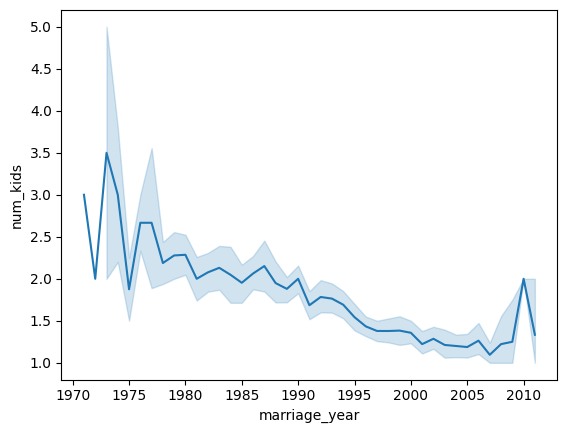

In [10]:
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Create a line plot showing the average number of kids by year
sns.lineplot(data=divorce, x="marriage_year", y="num_kids")
plt.show()

# You've discovered a pattern here: it looks like couples who had later marriage
# years also had fewer children during their marriage.

**Visualizing variable relationships**   
In the last exercise, you may have noticed that a longer marriage_duration is correlated with having more children, represented by the num_kids column. The correlation coefficient between the marriage_duration and num_kids variables is 0.45.

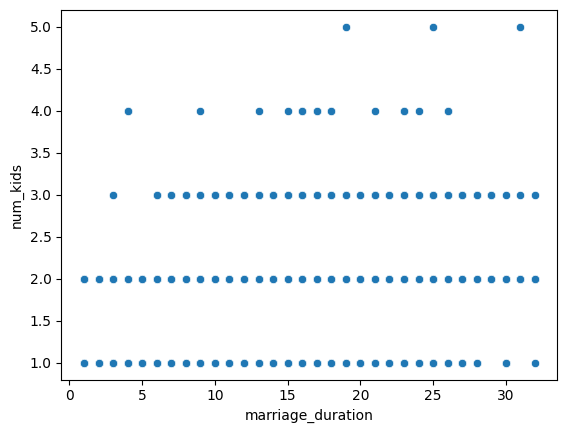

In [11]:
# Create the scatterplot
sns.scatterplot(data=divorce, x="marriage_duration", y="num_kids")
plt.show()

# There is a slight positive relationship in your scatterplot. In the dataset,
# couples with no children have no value in the num_kids column. If you are confident
# that all or most of the missing values in num_kids are related to couples without
# children, you could consider updating these values to 0, which might increase the correlation.

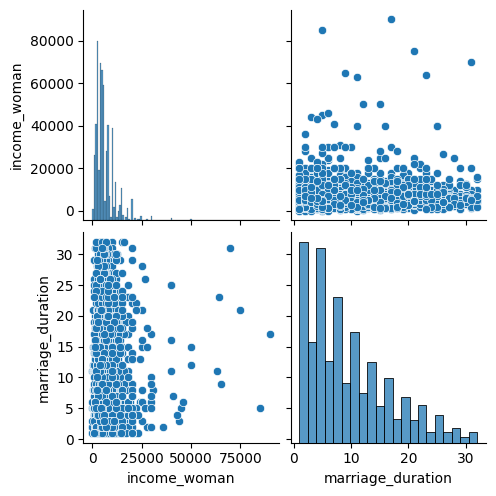

In [12]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars=["income_woman" , "marriage_duration"])
plt.show()

# Just as in the correlation matrix, you can see that the relationship between
# income_woman and marriage_duration is not a strong one. You can also get a sense
# of the distributions of both variables in the upper left and lower right plots.

**Categorical data in scatter plots**  
In the video, we explored how men's education and age at marriage related to other variables in our dataset, the divorce DataFrame. Now, you'll take a look at how women's education and age at marriage relate to other variables!

Your task is to create a scatter plot of each woman's age and income, layering in the categorical variable of education level for additional context.

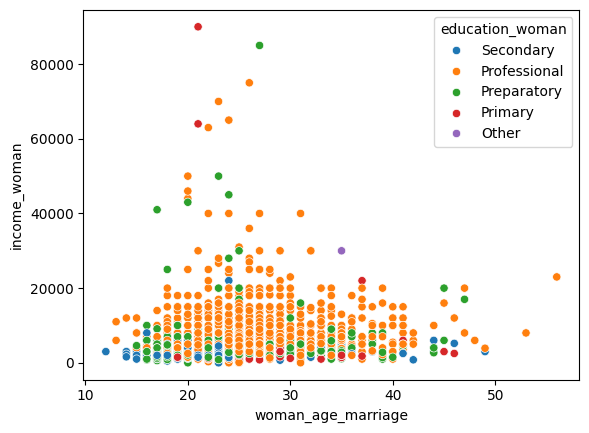

In [18]:
# Create the scatter plot

divorce["woman_age_marriage"] = divorce["marriage_date"] - pd.to_datetime(divorce["dob_woman"])
divorce["woman_age_marriage"] = divorce["woman_age_marriage"].dt.days // 365

sns.scatterplot(data=divorce, x="woman_age_marriage", y="income_woman", hue="education_woman")
plt.show()

# it looks like there is a positive correlation between professional education
# and higher salaries, as you might expect. The relationship between women's age
# at marriage and education level is a little less clear.

**Exploring with KDE plots**   
Kernel Density Estimate (KDE) plots are a great alternative to histograms when you want to show multiple distributions in the same visual.

Suppose you are interested in the relationship between marriage duration and the number of kids that a couple has. Since values in the num_kids column range only from one to five, you can plot the KDE for each value on the same plot.

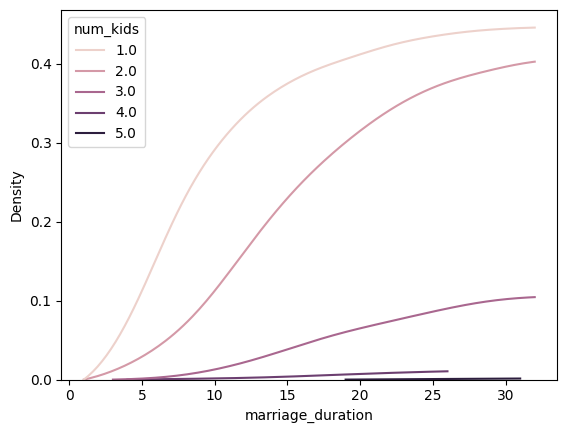

In [19]:
# Update the KDE plot to show a cumulative distribution function
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()


# It looks as though there is a positive correlation between longer marriages and
#  more children, but of course, this doesn't indicate causation. You can also see
#   that there is much less data on couples with more than two children; this helps
#    us understand how reliable our findings are.